# Class 09: More about Julia & questions answered
## Solving linear systems
A common problem encountered in physics is having to solve a linear systems of equations; 
a good example of this occurs in electrical circuits. For example, consider the circuit below:<br>

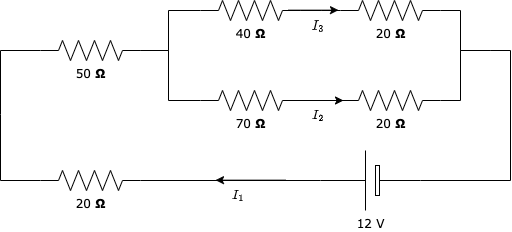

Using Kirchoff's Laws, we can write three equations which will allow us to find the three unknown currents:

$$ 12 - 70I_1 -90 I_2 = 0\\
 12 - 70I_1 - 60 I_3 = 0\\
I_1  - I_2 - I_3 = 0$$

Simplifying:
$$ 70I_1 + 90 I_2  + 0 I_3= 12\\
 70I_1 +0 I_2 +  60 I_3 = 12\\
I_1  - I_2 - I3 = 0$$

This system can be written in matrix form $ \underset{\sim}{A} \vec{I} = \vec{b}$ as<br>

$$\begin{bmatrix}
70 & 90 & 0\\
70 & 0 & 60\\
1  & -1 & -1
\end{bmatrix} \begin{bmatrix}
I_1\\
I_2\\
I_3\end{bmatrix} = 
\begin{bmatrix}
12\\
12\\
0\end{bmatrix}
$$
To solve this in Julia, we define $ \underset{\sim}{A}$ and $\vec{b}$ :

In [1]:
A = [70  90  0; 
     70  0  60; 
      1 -1  -1]

 
b = [12; 12; 0];

Then, the solution is as simple as

In [2]:
I = A \ b

3-element Vector{Float64}:
 0.11320754716981132
 0.045283018867924525
 0.06792452830188679

Or, converting to milliamps and rounding,

In [3]:
currents = round.(1000*I; digits=1)

3-element Vector{Float64}:
 113.2
  45.3
  67.9

I find the notation<br>
```julia
I = A \ b
```
confusing at best; the solution returned is for the unknown vector of currents, and 
we can check that this is the case by multiplying the matrix A with the vector I:

In [4]:
A * I

3-element Vector{Float64}:
 12.0
 12.0
  1.3877787807814457e-17

### Testing for approximate equality in Julia
Julia has a built-in function *isapprox* that allows you to test whether two numbers are roughly equal.
You can test of absolute tolerance (i.e. the two numbers are within some difference $\Delta$ of each other)
or for relative tolerance. (i.e. the ratio of the two numbers is close to 1 within some fraction).

Let's compare a few numbers to see how this works (and understand the limitations):

In [5]:
isapprox(100, 98.0; rtol = 0.01)

false

In [6]:
isapprox(100, 98.0; rtol = 0.02)

true

In [7]:
isapprox(2.01,3.20; atol=1.0)

false

In [8]:
isapprox(2.01,3.20; atol=1.2)

true

Now we can compare check our solution for the electrical circuit discussed earlier:

In [9]:
isapprox.(A*I, b; atol = 0.01)

3-element BitVector:
 1
 1
 1

### Numerical derivatives in Julia
In our last class, we *numerically* approximated a derivative by using the standard derivative formula
called the *forward difference approximation*:
$$ f^{\prime}(x) \approx \frac{f(x+\Delta x) - f(x)}{\Delta x},$$
It's also possible to estimate the derivative using the *backward difference*:
$$ f^{\prime}(x) \approx \frac{f(x) - f(x-\Delta x)}{\Delta x},$$
and yet another method is the *central difference* approximation:
$$ f^{\prime}(x) \approx \frac{f(x+\Delta x) - f(x-\Delta x)}{2\Delta x},$$
where $\Delta x =x_i - x_{i-1} = x_{i+1} - x_i $ are both small.

In [10]:
df(f,x,Δx) = (f(x+Δx) - f(x))/Δx

df (generic function with 1 method)

In [11]:
f(x) = sin(x)

f (generic function with 1 method)

In [21]:
Δx = 0.00001
x = π/3
df.(f,x,Δx)

0.499995669867026

####  The ForwardDiff.jl and FiniteDifferences.jl packages in Julia
Automatic Differentiation is a technique in numerical analysis that gets around the troubles associated with the finite difference method. See
https://juliadiff.org/ForwardDiff.jl/stable/ for more info. Here's a simple application:

In [22]:
using ForwardDiff, FiniteDifferences

In [23]:
println("forwardDiff = ", ForwardDiff.derivative(f,π/3))
println("centralDiff 5th order = ", central_fdm(5, 1)(sin, π/3))

forwardDiff = 0.5000000000000001
centralDiff 5th order = 0.4999999999999536


# Adding Noise to a curve to simulate real data
The most common noise is Gaussian. There are several ways to generate Gaussian noise. The simplest is to use the 
built-in Julia function *randn()* :


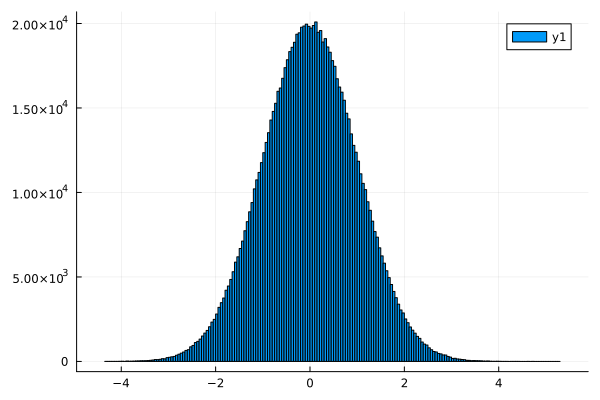

In [40]:
using Plots
gr()
x = randn(Float64, 1_000_000) # 1 million numbers drawn from a Gaussian distribution
histogram(x_2)

Another method is to use the Distributions package and the Random package; the Distributions.jl package has an extensive library of different distributions of which the Normal (i.e. Gaussian) is just one:

In [41]:
using Distributions
using Random

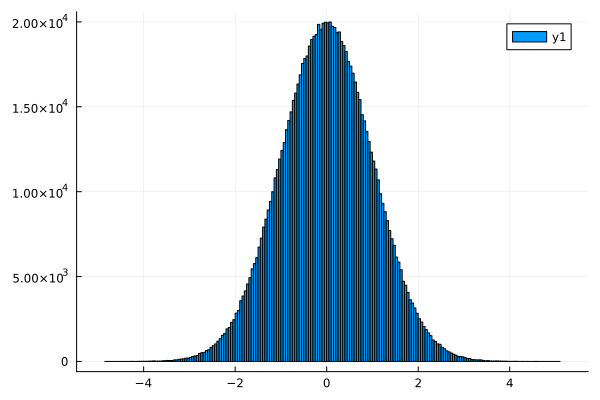

In [42]:
d = Normal(0.0,1.0)
x = rand(d, 1_000_000)
histogram(x)

If you need *uniformly* distributed numbers, then just use the *rand()* function.

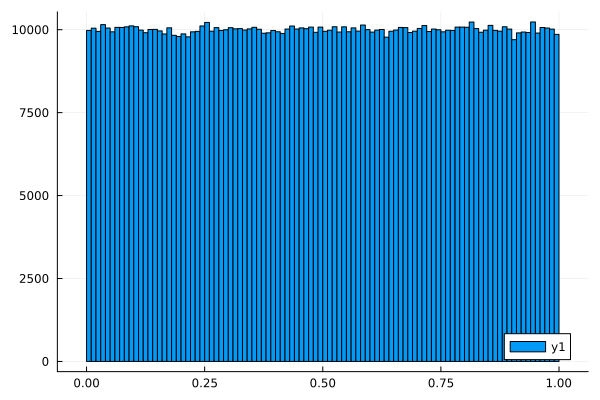

In [43]:
histogram(rand(1_000_000))